Experiment 1: Servomechanism Control

In [144]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1] <class 'numpy.int32'>


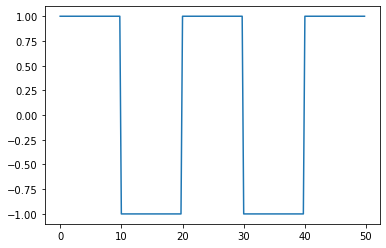

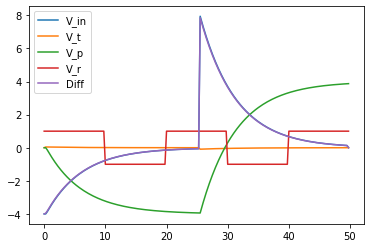

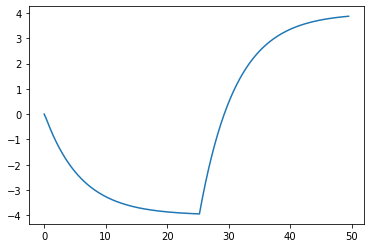

In [161]:
def tachoOutputVoltage(k_t, dTheta):
    return k_t * dTheta

def motorTorque(k_1, V_in, k_2, dTheta):
    return k_1*(V_in - k_2*dTheta)

def calculate_V_in(V_r, V_p, r_1):
    return -1*(V_r+V_p)*r_1

def motorVoltage(k_t,k_m,V_in,c,t):
    return (-1*k_t*k_m*V_in)*(1-math.exp(-1*c*t))/(30*c)

dt = 0.25
tEnd = 50
timeSteps = np.arange(0,tEnd,dt)
V_t = np.zeros(len(timeSteps))
V_in = np.zeros(len(timeSteps))
V_p = np.zeros(len(timeSteps))

theta = np.zeros(len(timeSteps))

k_t = 2
k_m = 1
c = 6

V_r = np.array([1 if math.floor(0.1 * t) % 2 == 0 else -1 for t in timeSteps])
V_r_const = 4

print(V_r, type(V_r[0]))

plt.plot(timeSteps, V_r)
plt.show()

for t in range(len(timeSteps[:-1])):
    
    vr = V_r[t]
    V_in[t] = calculate_V_in(V_r_const, V_p[t], 1)
    V_t[t] = motorVoltage(k_t,k_m,V_in[t],c,t)

    dTheta = ((k_m*V_in[t])/c)*(1-math.exp(-1*c*timeSteps[t]))

    if(t == 0):
        theta[t] = 0 + dTheta*dt
    else:
        theta[t] = theta[t-1] + dTheta*dt

    V_p[t+1] = theta[t]

    #print(timeSteps[t],V_p[t],V_in[t],V_t[t], theta[t], dTheta)
    

    if(t > len(timeSteps)/2):
        V_r_const = -4

V_diff = np.add(V_t,V_in)

plt.plot(timeSteps,V_in, label = "V_in")
plt.plot(timeSteps,V_t, label = "V_t")
plt.plot(timeSteps,V_p, label = "V_p")
plt.plot(timeSteps,V_r, label = "V_r")
plt.plot(timeSteps, V_diff, label = "Diff")
plt.legend()
plt.show()

plt.plot(timeSteps[:-1], theta[:-1])